In [1]:
from top2vec import Top2Vec
from gensim.models.coherencemodel import CoherenceModel
import os
import pandas as pd
from nltk.tokenize import word_tokenize

import gensim.corpora as corpora
from utils.config import random_sample,seed

In [2]:
import os
import pandas as pd

In [3]:
from utils.filemanagement import load_from_file, write_topics_file, get_project_root

model_type = "top2vec"
model_name = "Top2Vec"
experiment="embedding"
embedding_model = "distiluse-base-multilingual-cased-v2"
data_type="np_mini_stopwords"
file_name=f"{model_type}_{embedding_model}_{data_type}"
folder_path_data =f"preprocessed_data"
file_name_data = f"{data_type}.csv"

folder_path_topics = f"preprocessed_data/results/embedding/{model_type}"
folder_path_word_cloud = f"preprocessed_data/wordclouds/{experiment}/{model_type}/{file_name}"

folder_name = f"Embedding-experiment/models/{model_type}"
ROOT_PATH = get_project_root()
file_path = os.path.join(ROOT_PATH,folder_name,file_name)


df = load_from_file(folder_path_data,file_name_data)


data = df.text.values.tolist()
new_data = []
for item in data:
    new_data.append(str(item))

In [4]:
topic_model = None

try:
    topic_model = Top2Vec.load(file_path)
except:
    print("success")
    topic_model = Top2Vec(documents = new_data,embedding_model="distiluse-base-multilingual-cased-v2")

In [5]:
topic_model.save(file_path)

In [6]:
print(topic_model.embedding_model)

distiluse-base-multilingual-cased-v2


In [7]:
num_topics = topic_model.get_num_topics()
print(num_topics)

25


In [8]:
topic_sizes, topic_nums = topic_model.get_topic_sizes()

In [9]:
topic_words, word_scores, topic_nums = topic_model.get_topics(num_topics)

In [10]:
topic_word_scores = [dict(zip(topic_words[i][:], word_scores[i])) for i in topic_nums]

In [11]:
topic_model.get_topics()

(array([['takke', 'takk', 'takker', ..., 'klarte', 'statsradens', 'nrk'],
        ['skoler', 'høyskoler', 'skole', ..., 'auke', 'undervisning',
         'verdier'],
        ['nordnorge', 'nordiske', 'norges', ..., 'tenke', 'fn',
         'apenbart'],
        ...,
        ['kirke', 'kristeleg', 'kristelig', ..., 'statsbudsjett',
         'trengs', 'flertallet'],
        ['gamle', 'eldre', 'voksne', ..., 'galt', 'faglig', 'skatte'],
        ['alkohol', 'verre', 'regjeringens', ..., 'co', 'tenke', 'takk']],
       dtype='<U15'),
 array([[0.15966594, 0.15792061, 0.14837575, ..., 0.09008303, 0.08997695,
         0.08953173],
        [0.1825355 , 0.1720438 , 0.17185305, ..., 0.0933157 , 0.08970853,
         0.08684841],
        [0.23091546, 0.20919755, 0.19386332, ..., 0.06813529, 0.0673735 ,
         0.06717107],
        ...,
        [0.33417   , 0.19286966, 0.16908945, ..., 0.09134452, 0.09113838,
         0.0909363 ],
        [0.24786764, 0.17189045, 0.15213597, ..., 0.08489413, 0.0847725

In [12]:
for i in range(num_topics):
    print("\n", i)
    print(topic_word_scores[i])



 0
{'takke': 0.15966594, 'takk': 0.15792061, 'takker': 0.14837575, 'fatt': 0.14740963, 'dessverre': 0.14729433, 'co': 0.14217699, 'sannsynligvis': 0.13044383, 'heldigvis': 0.13021415, 'bla': 0.12995474, 'tak': 0.12836194, 'klarer': 0.12710741, 'selvsagt': 0.1235062, 'fullstendig': 0.12294708, 'selvfølgelig': 0.122910276, 'uheldig': 0.121601984, 'galt': 0.12030634, 'auke': 0.12027199, 'bo': 0.11928752, 'skikkelig': 0.118802994, 'bestemt': 0.11818138, 'virkelig': 0.11795272, 'fns': 0.115838185, 'fag': 0.11557363, 'sak': 0.11355841, 'egentlig': 0.11241503, 'apenbart': 0.111396134, 'fn': 0.111297265, 'nav': 0.1103158, 'regjeringens': 0.11003135, 'sjølvsagt': 0.109704584, 'hvorvidt': 0.1094145, 'auka': 0.10922335, 'gode': 0.10860814, 'grundig': 0.108335406, 'rimelig': 0.1081514, 'sla': 0.107127756, 'mal': 0.104879156, 'faglig': 0.1043455, 'slett': 0.10387436, 'utrolig': 0.103744976, 'sikker': 0.10325168, 'absolutt': 0.100799404, 'riktig': 0.09850022, 'skjønn': 0.09741156, 'nevne': 0.097329

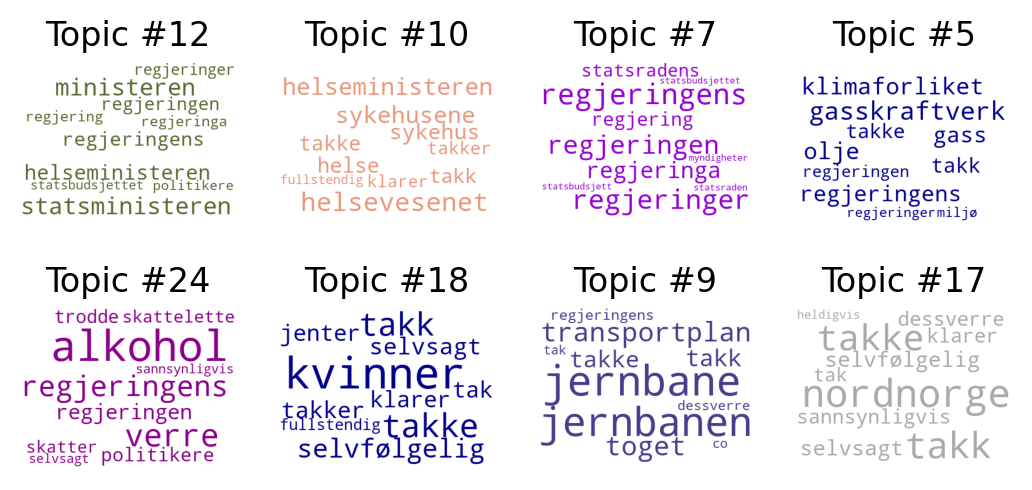

In [13]:

from utils.filemanagement import make_excerpt_wordcloud

excerpt_wordcloud = make_excerpt_wordcloud(topic_word_scores, num_topics,
                                           f"Sample from {model_name}-{embedding_model}: {data_type}",
                                           random_sample=random_sample, seed=seed)

excerpt_wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud_sample"),bbox_inches="tight")

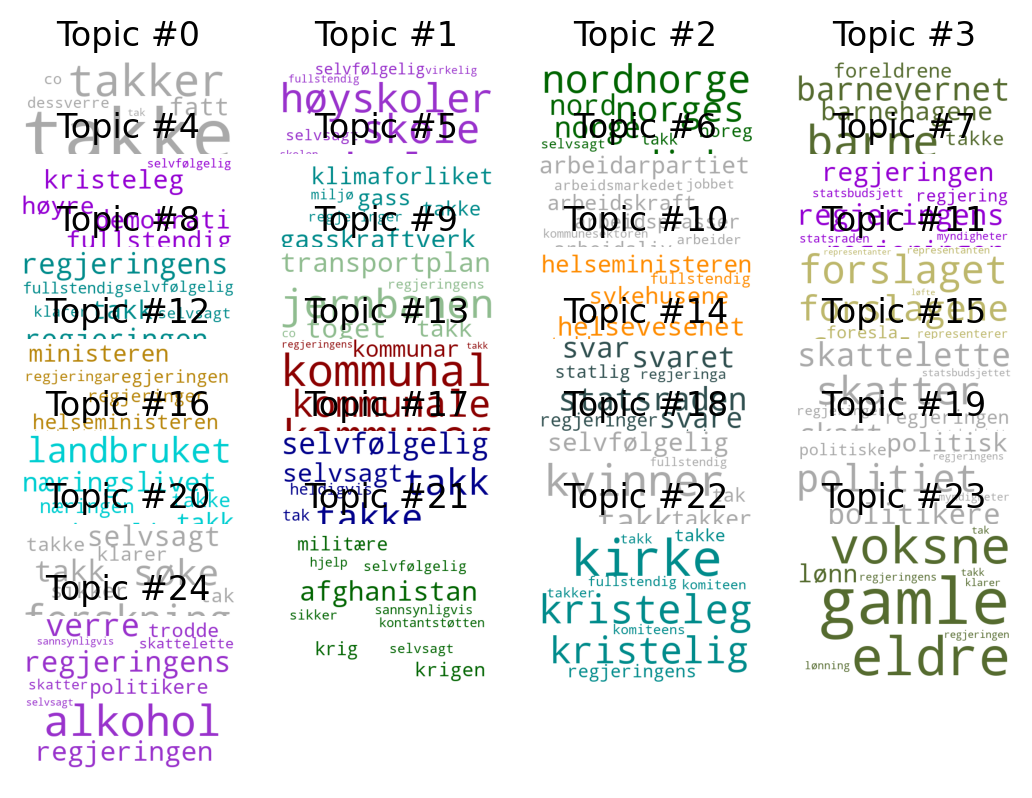

In [14]:
from utils.tables_and_plots import display_n_wordclouds

wordcloud = display_n_wordclouds(topic_word_scores, f"{model_name}-{embedding_model}: {data_type}",num_topics, dpi=200)


In [15]:
from utils.tables_and_plots import create_wordcloud
wordcloud.savefig(os.path.join(ROOT_PATH,folder_path_word_cloud,f"{file_name}_wordcloud"))
file_name_model = "wordcloud"
for i in range(num_topics):
    topic_wordcloud = create_wordcloud(topic_word_scores[i])
    topic_wordcloud.to_file(os.path.join(ROOT_PATH, folder_path_word_cloud, str(file_name_model + f"_{i}.png")))

In [16]:
from utils.filemanagement import write_topics_file

topic_words_numbered = [(i, list(topic_words[i])) for i in range(num_topics)]

write_topics_file(folder_path_topics, file_name, topic_words_numbered)

In [17]:
from utils.filemanagement import load_model_topics

loaded_topics = load_model_topics(folder_path_topics, file_name)

In [18]:
folder_path_frequencies = r"preprocessed_data/stats"
file_name_co_frequencies = f"{data_type}_co_freq"
file_name_frequencies=f"{data_type}_freq"

In [19]:
len(loaded_topics.values())

25

In [20]:

from utils.filemanagement import load_word_frequencies

word_frequencies = load_word_frequencies(folder_path_frequencies, file_name_frequencies)

In [21]:
from utils.filemanagement import load_zipped_word_co_frequencies

word_co_frequencies = load_zipped_word_co_frequencies(folder_path_frequencies,file_name_co_frequencies)

In [22]:
from utils.stats import compute_metrics
input_data = list(loaded_topics.values())
coherence, diversity = compute_metrics(
    input_data, word_frequencies, word_co_frequencies, 10)

10
('takk', 'takke') wordtuple
('takk', 'takke') wordup
14.0 over
11550.0 under
-9.688250309133178 -3.8073549220576037 2.544614439017776 ('takk', 'takke') 14 154 75
('takke', 'takker') wordtuple
('fatt', 'takke') wordtuple
('fatt', 'takke') wordup
6.0 over
8624.0 under
-10.48917896203135 -2.584962500721156 4.057768327047323 ('fatt', 'takke') 6 154 56
('dessverre', 'takke') wordtuple
('dessverre', 'takke') wordup
20.0 over
38808.0 under
-10.922138369307456 -4.321928094887363 2.5271448597740047 ('dessverre', 'takke') 20 154 252
('co', 'takke') wordtuple
('sannsynligvis', 'takke') wordtuple
('sannsynligvis', 'takke') wordup
2.0 over
9548.0 under
-12.220982851081777 -1.0 12.220982851081777 ('sannsynligvis', 'takke') 2 154 62
('heldigvis', 'takke') wordtuple
('heldigvis', 'takke') wordup
7.0 over
10010.0 under
-10.481799431665753 -2.807354922057604 3.733692291384123 ('heldigvis', 'takke') 7 154 65
('bla', 'takke') wordtuple
('bla', 'takke') wordup
90.0 over
99484.0 under
-10.110323799059152

In [23]:
from nltk import word_tokenize
from utils.config import use_pmi
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
if not use_pmi:
    corpus_tokenized = []
    for item in new_data:
        word_tokens = word_tokenize(item)
        corpus_tokenized.append(word_tokens)

    dct = Dictionary(corpus_tokenized)
    inp = list(loaded_topics.values())


    cm = CoherenceModel(topics=inp, texts = corpus_tokenized, dictionary=dct, coherence='c_npmi')
    coherence2 = cm.get_coherence()  # get coherence value
    print(coherence2)

-0.2257938577398158


In [24]:
diversity

0.576

In [25]:
coherence

2.637533690369139

In [26]:
from tabulate import tabulate
import csv

In [27]:
# Check the stats for the dataset after running basic pipeline

models = [file_name for i in range(0, 2)]
metrics = ["coherence" if i < 1 else "diversity" for i in range(0, 2)]
values = [
    coherence,
    diversity
    ]

stats = [models, metrics, values]
stats_tabulate = list(zip(*stats))
print(tabulate(stats_tabulate, headers=["Model", "Metric", "Value"], tablefmt="fancy_grid"))

╒════════════════════════════════════════════════════════════════╤═══════════╤═════════╕
│ Model                                                          │ Metric    │   Value │
╞════════════════════════════════════════════════════════════════╪═══════════╪═════════╡
│ top2vec_distiluse-base-multilingual-cased-v2_np_mini_stopwords │ coherence │ 2.63753 │
├────────────────────────────────────────────────────────────────┼───────────┼─────────┤
│ top2vec_distiluse-base-multilingual-cased-v2_np_mini_stopwords │ diversity │ 0.576   │
╘════════════════════════════════════════════════════════════════╧═══════════╧═════════╛


In [28]:
# Save all topic stats to file

topic_stats_folder_path = fr"preprocessed_data/metrics/{experiment}/{model_type}"
topic_stats_file_name = f"{file_name}_stats"
topic_stats_path = os.path.join(ROOT_PATH,topic_stats_folder_path, topic_stats_file_name + r".csv")

TOPIC_STAT = "Topic stat"
VALUE = "Value"

with open(topic_stats_path, encoding="utf-8", mode="w", newline="") as topic_stats_file:
    header = [TOPIC_STAT, VALUE]
    writer = csv.DictWriter(topic_stats_file, fieldnames=header, delimiter=";")
    writer.writeheader()
    writer.writerow({TOPIC_STAT : "Coherence", VALUE : coherence})
    writer.writerow({TOPIC_STAT : "Diversity", VALUE : diversity})